### Problem 1 (10 Points)

Sketch graphically the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad f({\bf x})=(x_1+1)^2+(x_2-2)^2\\
{\text{subject to }} & \quad g_1 = x_1-2\leq 0,{\quad} g_3 = -x_1\leq 0,\\
& \quad g_2 = x_2-1\leq 0, {\quad} g_4 = -x_2\leq 0.
\end{aligned}
$$

Find the optimum graphically. Determine directions of feasible descent at the corner points of the feasible domain. Show the gradient directions of $f$ and $g_i$'s at these points. Verify graphical results analytically using the KKT conditions.

### Problem 2 (10 Points)

Graph the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=-x_1\\
{\text{subject to }} & \quad g_1=x_2-(1-x_1)^3\leq 0{\quad} {\rm and}{\quad} x_2\geq 0.
\end{aligned}
$$ 

Find the solution graphically. Then apply the optimality conditions. Can you find a solution based on the optimality conditions? Why? (From Kuhn and Tucker, 1951.)

### Problem 3 (30 Points)

Find a local solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2,x_3} & \quad  f=x_1x_2+x_2x_3+x_1x_3\\
{\text{subject to }} & \quad h=x_1+x_2+x_3-3=0.
\end{aligned}
$$ 

Use two methods: reduced gradient and Lagrange multipliers.

### Problem 4 (20 Points)

Use reduced gradient to	find the value(s) of the parameter $b$ for which the point $x_1=1$, $x_2=2$ is the solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2} & \quad  f=2x_{1} + bx_2\\
{\text{subject to }} & \quad g_1 = x_{1}^{2}+ x_{2}^{2}-5\leq 0\\
& \quad g_2= x_1- x_2-2\leq 0.
\end{aligned}
$$ 

### Problem 5 (30 Points)

Find the solution for 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}\\
{\text{subject to }} & \quad h_1 = x_{1}^{2}/4+x_{2}^{2}/5+x_{3}^{2}/25-1=0\\
& \quad h_2 = x_1+x_2-x_3= 0,
\end{aligned}
$$ 

by implementing the generalized reduced gradient algorithm.

---
---
# Solutions:

## Problem 1

In [174]:
## imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
from matplotlib import cm


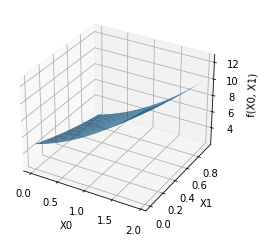

In [175]:
def f_prob_1(x):
    y = (x[0] + 1)**2 + (x[1] - 2)**2
    return y

def f_p1_plt(x0, x1):
    y = (x0 + 1)**2 + (x1 - 2)**2
    return y

fig = plt.figure()
ax = fig.gca(projection='3d')

x_grid = np.arange(0.0, 2.0, 0.05)
y_grid = np.arange(0.0, 1.0, 0.05)
X, Y = np.meshgrid(x_grid, y_grid)
zs = np.array(f_p1_plt(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

#ax.scatter(xp[yp == np.min(yp)][0,0], xp[yp == np.min(yp)][0,1], np.min(yp), s = 200, c='m', marker='o')

ax.plot_surface(X, Y, Z, alpha=0.9)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('f(X0, X1)')


plt.show()

---

## Problem 2

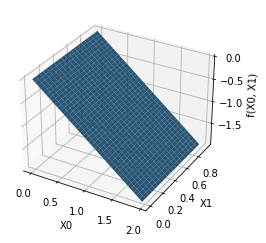

In [176]:
def f_prob_2(x):
    y = -1.0 * x[0]
    return y

def f_p2_plt(x0, x1):
    y = -1.0 * x0
    return y

fig = plt.figure()
ax = fig.gca(projection='3d')

x_grid = np.arange(0.0, 2.0, 0.05)
y_grid = np.arange(0.0, 1.0, 0.05)
X, Y = np.meshgrid(x_grid, y_grid)
zs = np.array(f_p2_plt(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

#ax.scatter(xp[yp == np.min(yp)][0,0], xp[yp == np.min(yp)][0,1], np.min(yp), s = 200, c='m', marker='o')

ax.plot_surface(X, Y, Z, alpha=0.9)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('f(X0, X1)')


plt.show()


---

## Problem 3

Starting with the Lagrange multipliers method, we can write the Lagrangian as 
$$
 \mathcal{L}(x, \lambda) = f(x) - \lambda h(x) = 
$$
$$
x_1x_2+x_2x_3+x_1x_3 - \lambda (x_1+x_2+x_3-3)\\
$$

Then setting the gradient of this to zero and solving is 
$$
\nabla_{x, \lambda} \mathcal{L}(x, \lambda) = 
\begin{aligned}
x_2 + x_3 - \lambda & = 0 \\
x_1 + x_3 - \lambda & = 0 \\
x_2 + x_1 - \lambda & = 0 \\
x_1 + x_2 + x_3 - 3 & = 0 
\end{aligned}
$$

This can be solved by observing that $\lambda = x_2 + x_3$, then $x_1 + x_3 - \lambda = 0 \implies x_1 - x_2 = 0 \implies x_1 = x_2$. Next, $2 x_1 - (x_1 + x_3) = 0 \implies x_1 = x_3$ and $x_1 = x_2 = x_3 = 1$. 

Then for the reduced gradient method, we take $d = (x_1, x_2)$, $s = x_3$, and can find
$$
\begin{aligned}
\frac{\partial f}{\partial d} =& (x_2 + x_3, x_1 + x_3) \\
\frac{\partial f}{\partial s} =& (x_2 + x_1) \\
\frac{\partial h}{\partial s} =& 1 \\
\frac{\partial h}{\partial d} =& (1, 1)
\end{aligned}
$$
and then 
$$
\begin{aligned}
\frac{df}{dd} =& \frac{\partial f}{\partial d} - \frac{\partial f}{\partial s} (\frac{\partial h}{\partial s})^{-1} \frac{\partial h}{\partial d} = (0, 0) = \\
& (x_2 + x_3, x_1 + x_3) - (x_2 + x_1) (1 / 1) (1, 1) = \\
&  (x_3 - x_1, x_3 - x_2) = (0, 0) \implies \\
& x_3 = x_1 \text{ and } x_3 = x_2 \text{, or } = x_1 = x_2 = x_3
\end{aligned}
$$
Combining this relationship with the equality constraint, we see
$$
x_1 + x_2 + x_3 - 3 = 0 \implies 3 x_1 - 3 = 0 \implies x_1 = x_2 = x_3 = 1
$$
which agrees with the Lagrange multipliers method. 

---

## Problem 4

We begin by taking $d = x_2$, $s = x_1$, and then can find

$$
\begin{aligned}
\frac{\partial f}{\partial d} =& b \\
\frac{\partial f}{\partial s} =& 2 \\
\frac{\partial h}{\partial s} =& 2 x_1 \\
\frac{\partial h}{\partial d} =& -2 x_2
\end{aligned}
$$
and then 
$$
\begin{aligned}
& \frac{df}{dd} = \frac{\partial f}{\partial d} - \frac{\partial f}{\partial s} (\frac{\partial h}{\partial s})^{-1} \frac{\partial h}{\partial d} = 0 = \\
&  b - (2) (\frac{1}{2x_1}) (-2x_2) = \\
&  b + 2 \frac{x_2}{x_1} = 0 \implies \\
& b = -2\frac{x_2}{x_1}
\end{aligned}
$$

Then for the point $(x_1, x_2) = (1, 2)$, $b$ evaluates to $b = -2 (2 / 1) = -4$. Therefore, the value of $b = -4$ makes the point $(x_1, x_2) = (1, 2)$ the solution to this optimization problem.


---

## Problem 5

Starting with defining the state and decision variables, we see that there are three total variables two equality constraints giving $n = 3$, $m = 2$, and $\text{dof} = n - m = 1$. Then let  $d = x_1$ and $s = (x_2, x_3)$.

Then we can find the equations for the terms used in the reduced gradient calculation as

$$
\begin{aligned}
\frac{\partial f}{\partial d} =& 2 x_1 \\
\frac{\partial f}{\partial s} =& (2 x_2, 2 x_3) \\
\frac{\partial h}{\partial s} =& \begin{bmatrix}
\frac{2}{5} x_2 & \frac{2}{25} x_3  \\
1 & -1 \\ \end{bmatrix}\\
\frac{\partial h}{\partial d} =& (\frac{1}{2} x_1, 1)
\end{aligned}
$$

Then we can initialize some initial $x_0 = (s_0, d_0)$ that satisifies the two constraints. Note that the point $x_0 = (s_0, d_0) = (x_1, x_2, x_3) = (0, \sqrt{25 / 6}, \sqrt{25 / 6})$ meets this condition.

## TODO: 
Actually impliment method.

In [177]:
def f_p5(x):
    y = x[0]**2 + x[1]**2 + x[2]**2
    return y

def del_f_del_d(x):
    return np.array([2.0 * x[0]])

def del_f_del_s(x):
    return np.array([2.0 * x[1], 2.0 * x[2]]) 

def del_h_del_s(x):
    return np.array([[2 * x[1] / 5, 2 * x[2] / 25], [1, -1]])

def del_h_del_d(x):
    return np.array([(1/2) * x[0], 1]) # make sure np handles dimensions correctly with this


    
# placing implimentation in a class for organization purposes.
class Prob5:
    def __init__(self, x_init, f_f, del_f_del_d_f, del_f_del_s_f, del_h_del_s_f, del_h_del_d_f):
        self.del_f_del_d_f = del_f_del_d_f # del_f_del_d
        self.del_f_del_s_f = del_f_del_s_f
        self.del_h_del_s_f = del_h_del_s_f
        self.del_h_del_d_f = del_h_del_d_f
        self.f_f = f_f # actual function being evaluated

        self.params_line_search = {'a' : 1.0, 't' : 0.001, 'eps' : 0.006, 'max_i' : 100, 'verbose' : True, 'debug_verbose' : False}
        self.m = 2
        self.n = 3
        
        self.iter_coutner = 0
        self.max_iter = 1000 # hardcoded, bad practice
        self.error_min = 10.0**(-1.0) # hardcoded, bad practice
        self.a_min = 10.0**(-3.0)
        self.lambda_val = 10.0**(-3.0)

        # dictionary of different values at each iteration. Used for debugging mostly.
        # basically using it as a table with out needing scalars, similar to a cell array in matlab
        self.value_dict = {"iter" : [self.iter_coutner], 
                            "x" : [x_init],
                            "del_f_del_d" : [del_f_del_d_f(x_init)],
                            "del_f_del_s" : [del_f_del_s_f(x_init)],
                            "del_h_del_s" : [del_h_del_s_f(x_init)],
                            "del_h_del_d" : [del_h_del_d_f(x_init)],
                            "df_dd" : [self.df_dd_f(x_init)],
                            "f" : [f_f(x_init)]} 
                            
    # recall that df/dd = del_f_del_d - del_f_del_s * inv(del_h_del_s) * del_h_del_d
    def df_dd_f(self, x):
        df_dd_val = self.del_f_del_d_f(x) - np.matmul(
            np.matmul(
                self.del_f_del_s_f(x),
                np.linalg.pinv(self.del_h_del_s_f(x))), 
            self.del_h_del_d_f(x))
        return df_dd_val

    def h_f(self, x):
        h_vals = np.array([x[0]**2 / 4 + x[1]**2 / 5 + x[2]**2 / 25 - 1,
            x[0] + x[1] - x[2]])
        return h_vals

    def updateValueDict(self, x):
        self.value_dict["iter"].append(self.iter_coutner)
        self.value_dict["x"].append(x)
        self.value_dict["del_f_del_d"].append(self.del_f_del_d_f(x))
        self.value_dict["del_f_del_s"].append(self.del_f_del_s_f(x))
        self.value_dict["del_h_del_s"].append(self.del_h_del_s_f(x))
        self.value_dict["del_h_del_d"].append(self.del_h_del_d_f(x))
        self.value_dict["df_dd"].append(self.df_dd_f(x))
        self.value_dict["f"].append(self.f_f(x))
        return 

    def line_search_f(self, x, a):
        d = x[0]
        s = x[1:3]

        # x = [d, s]
        if self.params_line_search["debug_verbose"]:
            print("## In line_search_f ##")
            print("x : " + str(x))
            print("df_dd : " + str(self.df_dd_f(x)))
            print("mat : " + str(np.matmul(
                                    np.linalg.pinv(self.del_h_del_s_f(x)),
                                    self.del_h_del_d_f(x))))
        d_new = d - a * self.df_dd_f(x)
        s_new = s + a * np.linalg.pinv(self.del_h_del_s_f(x)) @ self.del_h_del_d_f(x) * self.df_dd_f(x)
        s_new = s_new.flatten()
        if self.params_line_search["debug_verbose"]:
            #print("## In line_search_f ##")
            print("d_new : " + str(d_new))
            print("s_new : " + str(s_new))
        x_new = np.concatenate([d_new, s_new])

        fx_new = self.f_f(x_new)
        return fx_new

    # for gradient descent
    def line_search_phi(self, x, a_curr, params):
        #phi = cost(p) - params['a'] * params['t'][0] * np.dot(grad(p), grad(p))
        if params['debug_verbose']:
            print("## in line_search_phi ##")
            print(np.dot(self.df_dd_f(x), self.df_dd_f(x)))
        phi = self.f_f(x) - a_curr * params['t'] * np.dot(self.df_dd_f(x), self.df_dd_f(x))
        return phi

    def line_search(self, x, params):
        a = params['a']
        i = 0

        while self.line_search_phi(x, a, params) < self.line_search_f(x, a):
            a = 0.5 * a # b = 0.5
            i = i + 1

            if params['debug_verbose']:
                print("## In line_search ##")
                print("line_search_phi: " + str(self.line_search_phi(x, a, params)) + 
                    ", line_search_f(x, a): " + str(self.line_search_f(x, a)) + ", a: " + str(a))


            if(params['max_i'] < i):
                if params['debug_verbose']:
                    print("!! Iteration limit reached in line_search, returning a of " + str(a) + "!!")
                   # print("line_search_phi: " + str(self.line_search_phi(x, params)) + ", cost: " + str(cost(p - a * grad(p))) + ", a: " + str(a))
                return a

            if(a < self.a_min):
                if params['debug_verbose']:
                    print("!! Hit min value for a, returning a of " + str(a) + "!!")
                return a
        return a

    def lm_solver(self, x, s_k):
        s_k_init = s_k
        for i in range(self.max_iter):
            s_k_new = s_k - np.transpose(np.linalg.pinv(
                np.dot(self.del_h_del_s_f(x), self.del_h_del_s_f(x)) + 
                self.lambda_val * np.eye(self.m)) @ np.transpose(self.del_h_del_s_f(x)) @ self.h_f(x))
            diff = s_k_new - s_k
            if self.params_line_search['debug_verbose']:
                print("## In lm_solver - in loop ##")
                print("s_k : " + str(s_k))
                print("s_k_new : " + str(s_k_new))
                print("diff : " + str(diff))
                print("big mat : " + str(np.linalg.pinv(
                    np.dot(self.del_h_del_s_f(x), self.del_h_del_s_f(x)) + lambda_val * np.eye(self.m))))
                print("np.dot(diff, diff) : " + str( np.dot(diff, diff)))
                print("self.error_min : " + str(self.error_min))
            if np.dot(diff, diff) < self.error_min:
                return s_k_new
        if self.params_line_search["debug_verbose"]:
            print("## In lm_solver - after loop ##")
            print("!!Hit iteration limit!! Current value for s_k_new.")
            print("s_k_init : " + str(s_k_init))
            print("s_k : " + str(s_k))
            print("s_k_new : " + str(s_k_new))
        return s_k_new
        '''
        if self.params_line_search["verbose"]:
            print("## In lm_solver - after loop ##")
            print("!!Hit iteration limit!! Returning initial value for s_k.")
            print("s_k_init : " + str(s_k_init))
            print("s_k : " + str(s_k))
            print("s_k_new : " + str(s_k_new))
        return s_k_init
        '''
    def loop(self, x):
        for i in range(self.max_iter):
            df_dd_curr = self.value_dict["df_dd"][self.iter_coutner]
            df_dd_sqr_norm = np.dot(self.value_dict["df_dd"][self.iter_coutner], self.value_dict["df_dd"][self.iter_coutner])
            if  df_dd_sqr_norm < self.error_min:
                print("Converged!")
                return
            else:
                alpha_k = self.line_search(x, self.params_line_search)
                d_k = x[0]
                s_k = x[1:3]
                d_new = d_k - alpha_k * self.df_dd_f(x)
                s_new_appx = s_k + alpha_k * np.matmul(
                    np.linalg.pinv(self.del_h_del_s_f(x)),
                    self.del_h_del_d_f(x)
                    ) * self.df_dd_f(x)
                s_new = self.lm_solver(x, s_new_appx) # TODO
                x_new = np.concatenate([d_new, s_new])
                x = x_new
                
                self.iter_coutner = self.iter_coutner + 1
                self.updateValueDict(x_new)
            if (self.iter_coutner % 10 == 0):
                print("Iteration : " + str(self.iter_coutner))
                print("df_dd_curr : " + str(df_dd_curr))
                print("df_dd_sqr_norm : " + str(df_dd_sqr_norm))
        print("!!Hit iteration limit!!")
        return




In [178]:
x_init = np.array([0.0, np.sqrt(25.0 / 6.0), np.sqrt(25.0 / 6.0)])

prob5 = Prob5(x_init, f_p5, del_f_del_d, del_f_del_s, del_h_del_s, del_h_del_d)
prob5.verbose = False
prob5.max_iter = 1000 # hardcoded, bad practice
prob5.error_min = 10.0**(-6.0) # hardcoded, bad practice
prob5.a_min = 10.0**(-4.0)
prob5.params_line_search = {'a' : 1.0, 't' : 0.001, 'eps' : 0.006, 'max_i' : 1000, 'verbose' : True, 'debug_verbose' : False}
prob5.lambda_val = 1.0
prob5.loop(x_init)







Iteration : 10
df_dd_curr : [-0.31678819]
df_dd_sqr_norm : 0.10035475469734628
Iteration : 20
df_dd_curr : [-0.12747035]
df_dd_sqr_norm : 0.016248690431543655
Iteration : 30
df_dd_curr : [-0.05060503]
df_dd_sqr_norm : 0.0025608692275265795
Iteration : 40
df_dd_curr : [-0.01993741]
df_dd_sqr_norm : 0.00039750047220471436
Iteration : 50
df_dd_curr : [-0.0078271]
df_dd_sqr_norm : 6.126345390071275e-05
Iteration : 60
df_dd_curr : [-0.00306818]
df_dd_sqr_norm : 9.413747647736777e-06
Iteration : 70
df_dd_curr : [-0.00120198]
df_dd_sqr_norm : 1.4447664066354084e-06
Converged!


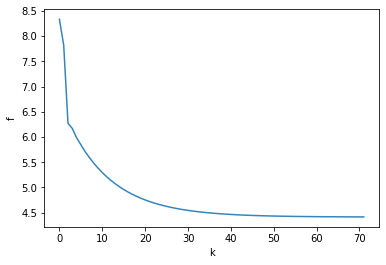

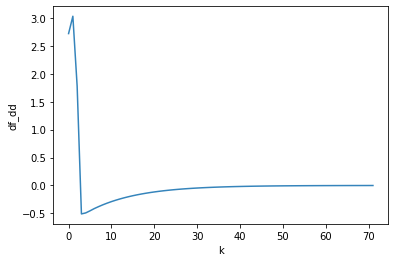

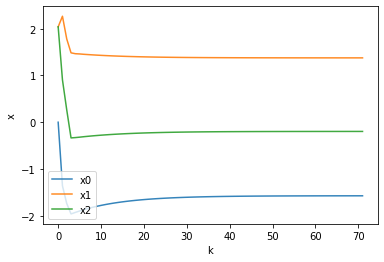

In [179]:
fig = plt.figure()
ax = fig.gca()



ax.plot(prob5.value_dict["iter"], prob5.value_dict["f"], alpha=0.9)

ax.set_xlabel('k')
ax.set_ylabel('f')


plt.show()

fig = plt.figure()
ax = fig.gca()

ax.plot(prob5.value_dict["iter"], prob5.value_dict["df_dd"], alpha=0.9)

ax.set_xlabel('k')
ax.set_ylabel('df_dd')


plt.show()


fig = plt.figure()
ax = fig.gca()

#print(prob5.value_dict["x"])
ax.plot(prob5.value_dict["iter"], prob5.value_dict["x"], alpha=0.9)

ax.set_xlabel('k')
ax.set_ylabel('x')
ax.legend(['x0', 'x1', 'x2'])

plt.show()